### importing dependencies 

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import date
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


### loading sample data 

In [2]:
perfSample = pd.read_csv('perfSample2.csv')
accSample = pd.read_csv('accSample2.csv')

In [3]:
msaReference = pd.read_csv('MSA_Reference_Two.csv')

In [4]:
msaReference.columns

Index(['PopRank', 'MSA-Location', 'State', 'Pop2013', 'Pop2010', 'Change%',
       'ChangePercent', 'Latitude', 'Longitude', 'CBSA Code'],
      dtype='object')

In [5]:
print(perfSample.dtypes)

loanID                                  int64
monthlyReportingPeriod                 object
servicerName                           object
currIntRate                           float64
currActualUPB                         float64
loanAge                                 int64
remainingMonthsToLegalMaturity          int64
adjustedMonthsToMaturity              float64
maturityDate                           object
msa                                     int64
currLoanDelinquencyStatus              object
modFlag                                object
zeroBalCode                           float64
zeroBalEffDate                         object
lastPaidInstallmentDate                object
foreclosureDate                        object
dispositionDate                        object
foreclosureCosts                      float64
propertyPreservationAndRepairCosts    float64
assetRecoveryCosts                    float64
miscHoldingExpnAndCredits             float64
assocTaxesForHoldingProperty      

In [6]:
# perfSample.head(2)

### assert position at start of line, match any whitespaces, . 

In [7]:
# regex , assert position at start of line, match any whitespaces, .
perfSample = perfSample.replace(r'^\s+$', np.nan, regex=True)

In [8]:
# perfSample.head(2)
perfSample = perfSample.loc[:,'loanID':'foreclosureDate']

### replacing NaN with 0 

In [9]:
# replace nan with 0
perfSample['foreclosureDate'] = perfSample['foreclosureDate'].replace(np.nan, 0)

In [10]:
perfSample['foreclosureDate'] = perfSample['foreclosureDate'].apply(lambda x: 1 if x != 0 else 0)

In [11]:
perfSample.head(2)

,loanID,monthlyReportingPeriod,servicerName,currIntRate,currActualUPB,loanAge,remainingMonthsToLegalMaturity,adjustedMonthsToMaturity,maturityDate,msa,currLoanDelinquencyStatus,modFlag,zeroBalCode,zeroBalEffDate,lastPaidInstallmentDate,foreclosureDate
0,100007365142,01/01/2000,NaN,8.0,NaN,0,360,359.0,01/2030,0,0,N,NaN,NaN,NaN,0
1,100007365142,02/01/2000,NaN,8.0,NaN,1,359,358.0,01/2030,0,0,N,NaN,NaN,NaN,0


In [12]:
accSample.dtypes

loanID                                  int64
origChannel                            object
sellerName                             object
origIntRate                           float64
orgUPB                                  int64
orgLoanTerm                             int64
orginationDate                         object
firstPaymentDate                       object
orgLTV                                  int64
orgCombinedLTV                        float64
numBorrowers                          float64
orgDebttoIncomeRatio                  float64
borrowerCreditScoreAtOrigination      float64
firstTimeHomeBuyer                     object
loanPurpose                            object
propType                               object
numUnits                                int64
occType                                object
propertyState                          object
zipCodeShort                            int64
priMortgageInsurancePercent           float64
prodType                          

In [13]:
accSample = accSample.loc[:,'loanID':'prodType']

In [14]:
accSample.head(2)

,loanID,origChannel,sellerName,origIntRate,orgUPB,orgLoanTerm,orginationDate,firstPaymentDate,orgLTV,orgCombinedLTV,...,borrowerCreditScoreAtOrigination,firstTimeHomeBuyer,loanPurpose,propType,numUnits,occType,propertyState,zipCodeShort,priMortgageInsurancePercent,prodType
0,100007365142,R,JPMORGAN CHASE BANK NA,8.000,75000,360,12/1999,02/2000,79,NaN,...,763.0,N,R,SF,1,P,PA,173,NaN,FRM
1,100007386460,B,JPMORGAN CHASE BANK NA,7.875,55000,180,01/2000,03/2000,69,NaN,...,633.0,N,R,CO,1,P,MD,208,NaN,FRM


### combining performance and acquisition sample 

In [15]:
combinedSample = pd.concat([perfSample, accSample], axis=1)
# combinedSample['foreclosure'] = 0

In [16]:
combinedSample.head(2)

,loanID,monthlyReportingPeriod,servicerName,currIntRate,currActualUPB,loanAge,remainingMonthsToLegalMaturity,adjustedMonthsToMaturity,maturityDate,msa,...,borrowerCreditScoreAtOrigination,firstTimeHomeBuyer,loanPurpose,propType,numUnits,occType,propertyState,zipCodeShort,priMortgageInsurancePercent,prodType
0,100007365142,01/01/2000,NaN,8.0,NaN,0,360,359.0,01/2030,0,...,763.0,N,R,SF,1,P,PA,173,NaN,FRM
1,100007365142,02/01/2000,NaN,8.0,NaN,1,359,358.0,01/2030,0,...,633.0,N,R,CO,1,P,MD,208,NaN,FRM


In [17]:
combinedSample.isna().sum()

loanID                                  0
monthlyReportingPeriod                  0
servicerName                        48892
currIntRate                             0
currActualUPB                        7863
loanAge                                 0
remainingMonthsToLegalMaturity          0
adjustedMonthsToMaturity              468
maturityDate                            0
msa                                     0
currLoanDelinquencyStatus              15
modFlag                                 0
zeroBalCode                         48689
zeroBalEffDate                      48689
lastPaidInstallmentDate             49984
foreclosureDate                         0
loanID                                  0
origChannel                             0
sellerName                              0
origIntRate                             0
orgUPB                                  0
orgLoanTerm                             0
orginationDate                          0
firstPaymentDate                  

### removing features 

In [18]:
# combinedSample = combinedSample.drop(['servicerName', 'currActualUPB', 'adjustedMonthsToMaturity', 
#                      'orgCombinedLTV', 'numBorrowers', 'orgDebttoIncomeRatio', 
#                      'borrowerCreditScoreAtOrigination', 'priMortgageInsurancePercent',
#                      'lastPaidInstallmentDate', 'zeroBalEffDate', 'zeroBalCode', 'maturityDate',
#                     'monthlyReportingPeriod', 'orginationDate', 'firstPaymentDate', 'loanID'], axis=1)

combinedSample = combinedSample.drop(['servicerName', 'currActualUPB', 'adjustedMonthsToMaturity', 
                     'orgCombinedLTV', 'numBorrowers', 'orgDebttoIncomeRatio', 
                     'borrowerCreditScoreAtOrigination', 'priMortgageInsurancePercent',
                     'lastPaidInstallmentDate', 'zeroBalCode', 'maturityDate',
                    'monthlyReportingPeriod', 'orginationDate', 'firstPaymentDate', 'loanID'], axis=1)

In [19]:
combinedSample.isna().sum()

currIntRate                           0
loanAge                               0
remainingMonthsToLegalMaturity        0
msa                                   0
currLoanDelinquencyStatus            15
modFlag                               0
zeroBalEffDate                    48689
foreclosureDate                       0
origChannel                           0
sellerName                            0
origIntRate                           0
orgUPB                                0
orgLoanTerm                           0
orgLTV                                0
firstTimeHomeBuyer                    0
loanPurpose                           0
propType                              0
numUnits                              0
occType                               0
propertyState                         0
zipCodeShort                          0
prodType                              0
dtype: int64

In [20]:
# converting date to a boolean flag
combinedSample['zeroBalEffDate'] = combinedSample['zeroBalEffDate'].replace(np.nan, 0)
combinedSample['zeroBalEffDate'] = combinedSample['zeroBalEffDate'].apply(lambda x: 1 if x != 0 else 0)

In [21]:
# finding nan, null values
# combinedSample[combinedSample.isnull().any(axis=1)]

In [22]:
# removing nan, null valued rows
combinedSample['currLoanDelinquencyStatus'] = combinedSample['currLoanDelinquencyStatus'].replace(np.nan, 0)
# combinedSample[combinedSample.isnull().any(axis=1)]
combinedSample = combinedSample.dropna(how='any')
combinedSample.isna().sum()

currIntRate                       0
loanAge                           0
remainingMonthsToLegalMaturity    0
msa                               0
currLoanDelinquencyStatus         0
modFlag                           0
zeroBalEffDate                    0
foreclosureDate                   0
origChannel                       0
sellerName                        0
origIntRate                       0
orgUPB                            0
orgLoanTerm                       0
orgLTV                            0
firstTimeHomeBuyer                0
loanPurpose                       0
propType                          0
numUnits                          0
occType                           0
propertyState                     0
zipCodeShort                      0
prodType                          0
dtype: int64

In [23]:
combinedSample = combinedSample[combinedSample.currLoanDelinquencyStatus != 'X']

In [24]:
# combinedSample.head(2)

In [25]:
# combinedSample.iloc[39]['currLoanDelinquencyStatus']

In [26]:
# cconverting 
combinedSample['currLoanDelinquencyStatus'] = pd.to_numeric(combinedSample['currLoanDelinquencyStatus'])

In [27]:
combinedSample.head(2)

,currIntRate,loanAge,remainingMonthsToLegalMaturity,msa,currLoanDelinquencyStatus,modFlag,zeroBalEffDate,foreclosureDate,origChannel,sellerName,...,orgLoanTerm,orgLTV,firstTimeHomeBuyer,loanPurpose,propType,numUnits,occType,propertyState,zipCodeShort,prodType
0,8.0,0,360,0,0,N,0,0,R,JPMORGAN CHASE BANK NA,...,360,79,N,R,SF,1,P,PA,173,FRM
1,8.0,1,359,0,0,N,0,0,B,JPMORGAN CHASE BANK NA,...,180,69,N,R,CO,1,P,MD,208,FRM


In [28]:
type(combinedSample.iloc[39]['currLoanDelinquencyStatus'])

numpy.int64

In [29]:
type(combinedSample.iloc[5000]['currLoanDelinquencyStatus'])

numpy.int64

In [30]:
def scaleCurrLoanDelinquencyStatus(x):
    if x < 30 :
        return 0
    elif x < 60 :
        return 1
    elif x < 90 :
        return 2
    elif x < 120 :
        return 3
    else:
        return 4
    
        

In [31]:
combinedSample['currLoanDelinquencyStatus'] = combinedSample['currLoanDelinquencyStatus'].apply(scaleCurrLoanDelinquencyStatus)

In [32]:
def dateToOrdinal(x):
    return date.toordinal(x)

In [33]:
# combinedSample['monthlyReportingPeriod'] = combinedSample['monthlyReportingPeriod'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%y"))

In [34]:
# combinedSample['monthlyReportingPeriod'] = combinedSample['monthlyReportingPeriod'].apply(dateToOrdinal)

In [35]:
combinedSample.columns

Index(['currIntRate', 'loanAge', 'remainingMonthsToLegalMaturity', 'msa',
       'currLoanDelinquencyStatus', 'modFlag', 'zeroBalEffDate',
       'foreclosureDate', 'origChannel', 'sellerName', 'origIntRate', 'orgUPB',
       'orgLoanTerm', 'orgLTV', 'firstTimeHomeBuyer', 'loanPurpose',
       'propType', 'numUnits', 'occType', 'propertyState', 'zipCodeShort',
       'prodType'],
      dtype='object')

### creating derived foreclosure flag 

In [36]:
combinedSample['foreclosure'] = np.where(combinedSample['zeroBalEffDate'] ==1 , 1, 0)
combinedSample['foreclosure'] = np.where(combinedSample['foreclosureDate'] ==1 , 1, 0)

#### joining combined sample with msa reference to get latitude and longitude 

In [37]:
# combinedSample['latitude'] = np.where(msaReference['CBSA Code'] == combinedSample['msa'] , msaReference['Latitude'], 0)
combinedSample = pd.merge(combinedSample, msaReference, left_on='msa', right_on='CBSA Code')
# combinedSample.isna().sum()

#### removing features correlated with label 

In [38]:
combinedSample = combinedSample.drop(['zeroBalEffDate', 'foreclosureDate'], axis=1)

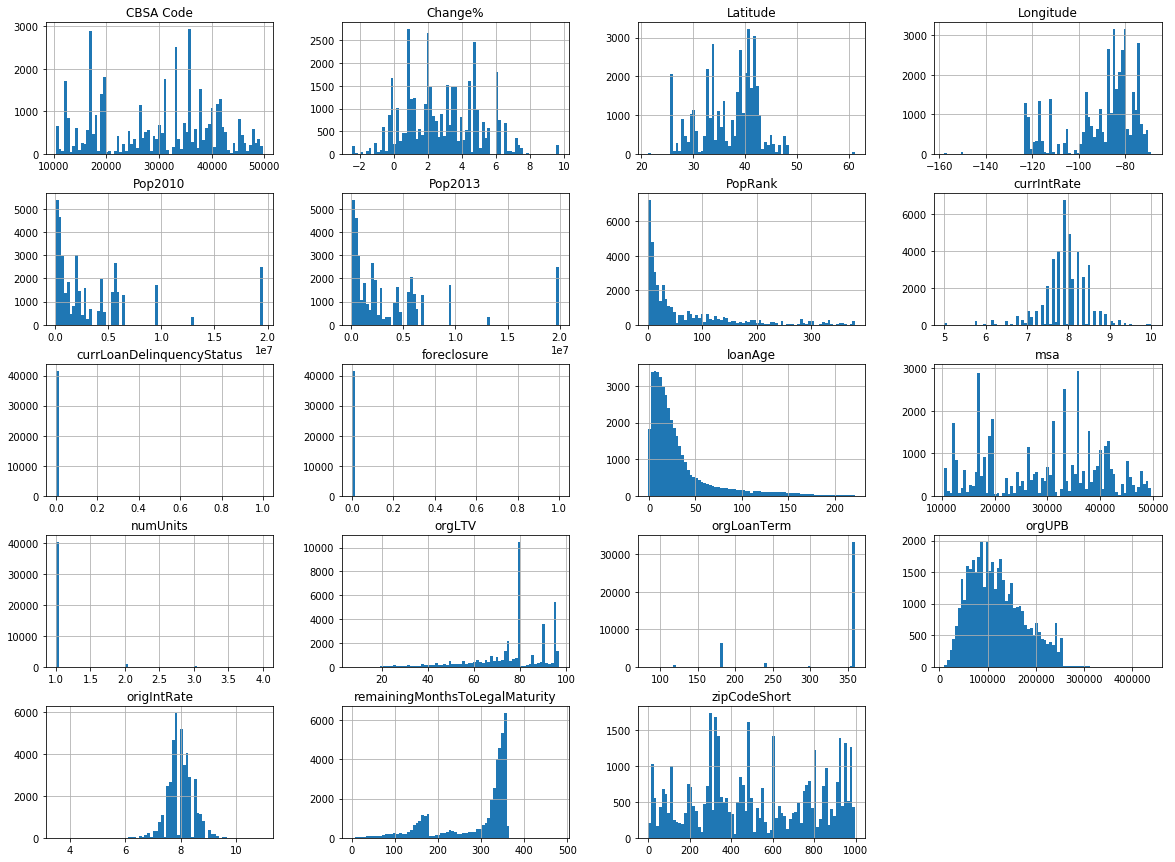

In [39]:
%matplotlib inline 
import matplotlib.pyplot as plt
combinedSample.hist(bins=75, figsize=(20,15))
plt.show()

In [46]:
# combinedSample.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)


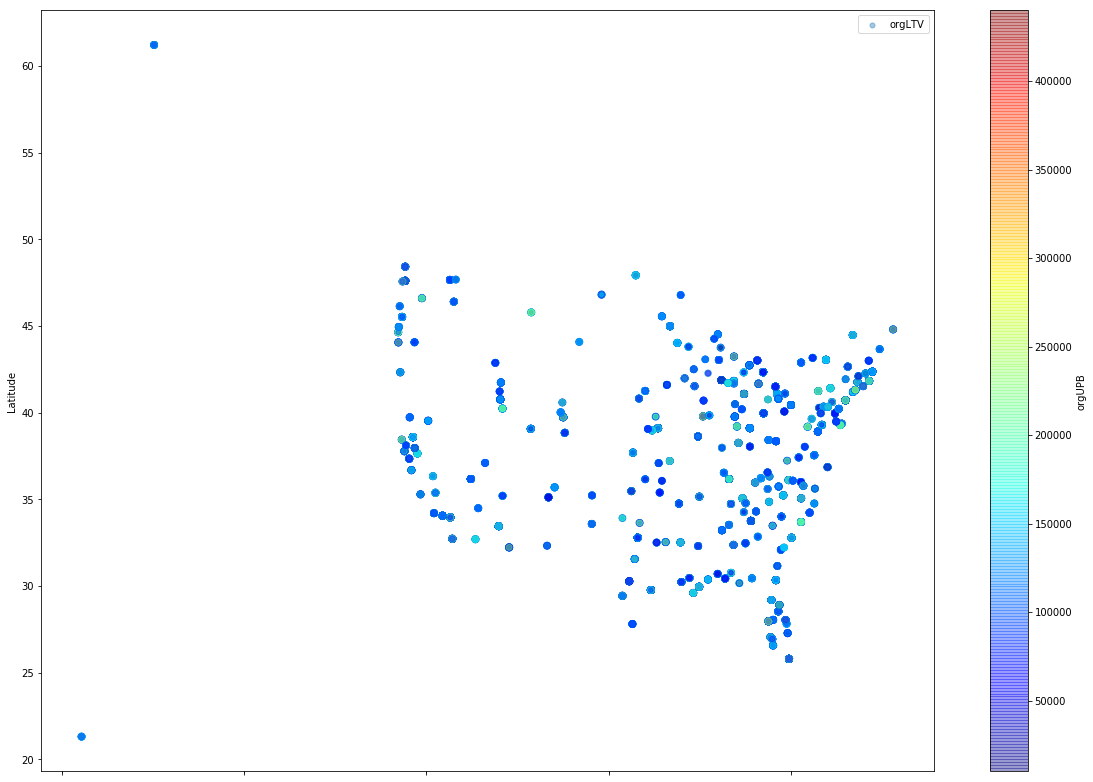

In [50]:
combinedSample.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=combinedSample["orgLTV"]/2, label="orgLTV", figsize=(20,14),
    c="orgUPB", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

#### one hot encoding for random forest 

In [ ]:
print("Original features: \n", list(combinedSample.columns), "\n")
combinedSample = pd.get_dummies(combinedSample)
print("Features after One-hot Encoding: \n", list(combinedSample.columns), "\n")

In [ ]:
# Get All Column's name of the input file
columnHeaders = list(combinedSample.columns.values)

#'quality' is the class attribute we are predicting
classColumn = 'foreclosure'
riskFeature = combinedSample.drop(columns=['foreclosure'])
riskClass = combinedSample[classColumn]

In [ ]:
combinedSample.groupby('foreclosure').count()

In [ ]:
combinedSample.head(5)

In [ ]:

# Splitting given dataset - Train: 75%, Test: 25%
trainFeature, testFeature, trainClass, testClass = train_test_split(riskFeature, riskClass, stratify=riskClass, train_size=.75, test_size=.25)
trainAccuracy = []
testAcuracy = []

#### training the random forest classifier 

In [ ]:
forest = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0, n_jobs=4)
forest.fit(trainFeature, trainClass)

In [ ]:
# Printing test and train accuracy of the classifier
print("Train set accuracy: {:.2f}".format(forest.score(trainFeature, trainClass)))
print("Test set accuracy: {:.2f}".format(forest.score(testFeature, testClass)))

In [ ]:
# Confusion matrix(6x6) including 'All' for test data
prediction = forest.predict(testFeature)
print("Confusion matrix:")
print(pd.crosstab(testClass, prediction, rownames=['True'], colnames=['Predicted'], margins=True))

In [ ]:
# Application of 10-fold stratified cross-validation
crossValidationScore = cross_val_score(forest, trainFeature, trainClass, cv=10)
print("Cross-validation scores: {}".format(crossValidationScore))
print("Average cross-validation score: {:.2f}".format(crossValidationScore.mean()))